In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/MyDrive/Oral Cancer/

/gdrive/MyDrive/Oral Cancer


In [ ]:
ls

 cancer/      'Oral cancer detection.h5'  'oral cancer-vggg19.h5'
 non-cancer/  'oral cancer resnet50.h5'


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=70
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Oral Cancer",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 100 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['cancer', 'non-cancer']

In [ ]:
len(dataset)

2

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[149.29492   60.29492   53.73242 ]
  [151.6875    62.6875    56.6875  ]
  [156.3877    73.387695  67.387695]
  ...
  [206.3877   156.41895  145.3252  ]
  [190.45215  141.4375   127.44238 ]
  [206.71875  161.79883  151.64746 ]]

 [[146.32227   58.745117  52.20215 ]
  [148.76465   59.76465   53.76465 ]
  [149.29199   64.01074   59.104492]
  ...
  [203.36816  147.3125   132.125   ]
  [185.00195  132.86035  118.875   ]
  [202.875    151.58887  143.25977 ]]

 [[145.6748    62.112305  56.393555]
  [146.13184   58.131836  54.131836]
  [146.78027   57.780273  53.780273]
  ...
  [203.8125   146.8125   127.8125  ]
  [200.33691  154.60059  138.625   ]
  [203.13184  150.71875  137.28125 ]]

 ...

 [[117.94336   47.043945  36.59375 ]
  [133.3125    59.3125    48.3125  ]
  [142.31348   71.50098   59.500977]
  ...
  [173.72461  121.31836  105.69336 ]
  [178.21875  127.59375  104.569336]
  [178.1377   123.606445 100.956055]]

 [[115.04785   45.819336  39.76172 ]
  [121. 

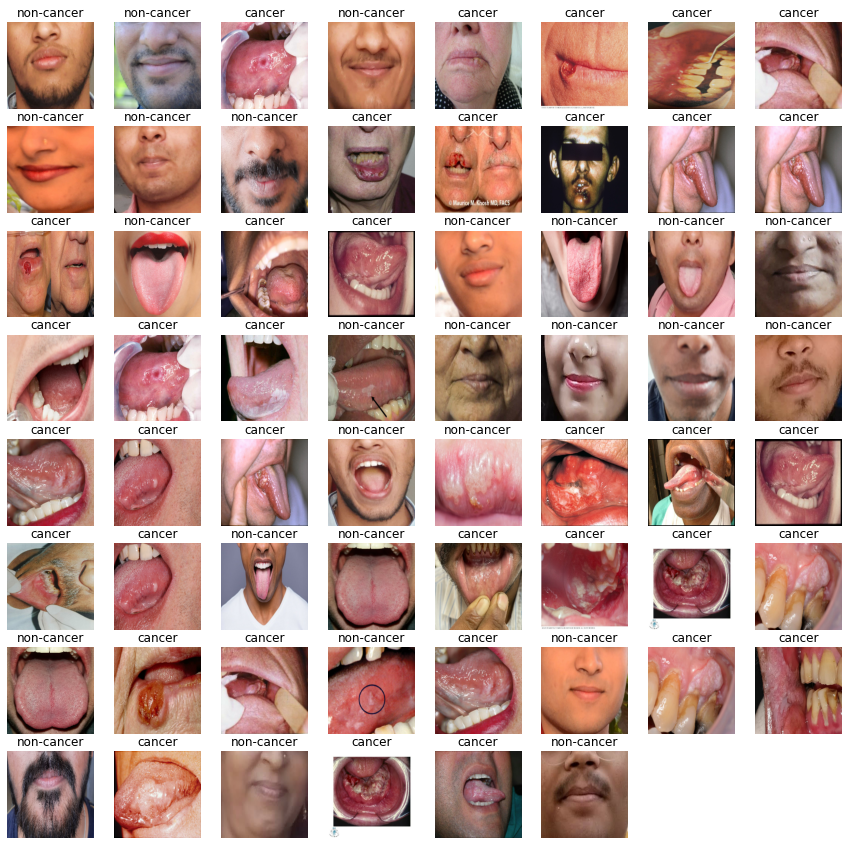

In [ ]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/70
1/1 [==============================] - 7s 7s/step - loss: 2.2068 - accuracy: 0.0000e+00
Epoch 2/70
1/1 [==============================] - 4s 4s/step - loss: 2.1259 - accuracy: 0.5789
Epoch 3/70
1/1 [==============================] - 4s 4s/step - loss: 1.9301 - accuracy: 0.5789
Epoch 4/70
1/1 [==============================] - 4s 4s/step - loss: 1.6646 - accuracy: 0.5789
Epoch 5/70
1/1 [==============================] - 4s 4s/step - loss: 1.5020 - accuracy: 0.5789
Epoch 6/70
1/1 [==============================] - 4s 4s/step - loss: 1.2902 - accuracy: 0.5789
Epoch 7/70
1/1 [==============================] - 4s 4s/step - loss: 1.0562 - accuracy: 0.5789
Epoch 8/70
1/1 [==============================] - 4s 4s/step - loss: 0.8878 - accuracy: 0.5789
Epoch 9/70
1/1 [==============================] - 4s 4s/step - loss: 0.7726 - accuracy: 0.7105
Epoch 10/70
1/1 [==============================] - 4s 4s/step - loss: 0.7040 - accuracy: 0.5526
Epoch 11/70
1/1 [============================

In [ ]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.2701 - accuracy: 0.8421


[0.2700515687465668, 0.8421052694320679]

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

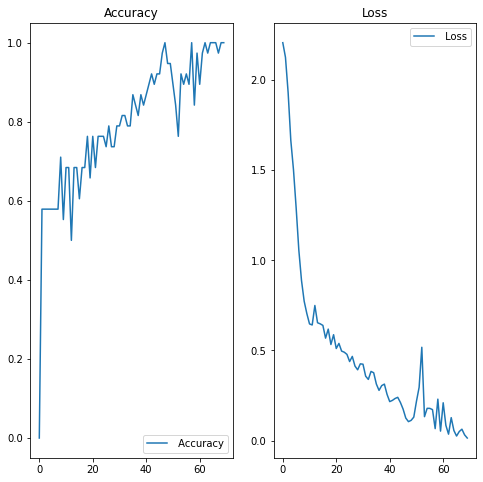

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

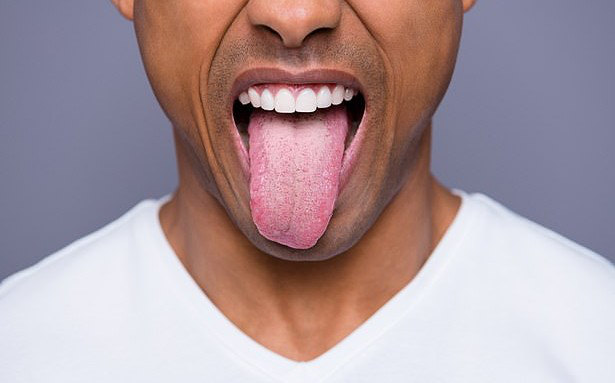

In [ ]:
image_path = "/gdrive/My Drive/12654650-6954555-image-a-22_1556101508834-Edited.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [ ]:
pred = model.predict(scaled_img)

In [ ]:
output = class_names[np.argmax(pred)]

In [ ]:
output

'cancer'

In [ ]:
model.save("Oral cancer detection.h5")